In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import joblib

In [ ]:
# training dataset in storage session hochladen und name umbennen
data = pd.read_csv('main_Dataset_11_shuffled_no-1.csv')

# Zielvariable setzen und sicherstellen, dass einige Features nicht fürs Training benutzt werden
excluded_columns = ['Critical Growth Stage', 'Date', 'Latitude', 'Longitude']
data = data.drop(columns=excluded_columns)
features_df = data
features_df = features_df.drop(columns=['days_to_next_critical'])
features = features_df
target = data['days_to_next_critical']

# Training split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# RandomForestRegressor initialisieren
model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Evaluierung
print(f"Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Accuracy mit einem vordefinierten Threshhold berechnen
error_threshold = 30 # Anzahl Tage Threshhold
y_pred_within_threshold = np.abs(y_test - y_pred) <= error_threshold
accuracy = np.mean(y_pred_within_threshold) * 100
print(f"Accuracy within {error_threshold} days: {accuracy:.2f}%")

# Model speichern
model_path = 'critical_growth_model.pkl'
joblib.dump(model, model_path)
print(f"Trained model saved at: {model_path}")

# Function für Modelbewertung
def evaluate_model(model, X, y_true, error_threshold=30):
    """Evaluate the model on a given dataset."""
    y_pred = model.predict(X)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    y_pred_within_threshold = np.abs(y_true - y_pred) <= error_threshold
    accuracy = np.mean(y_pred_within_threshold) * 100
    print(f"Evaluation Results:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")
    print(f"Accuracy within {error_threshold} days: {accuracy:.2f}%")
    return mae, rmse, r2, accuracy

print("\nEvaluating on the training set:")
evaluate_model(model, X_train, y_train)

print("\nEvaluating on the test set:")
evaluate_model(model, X_test, y_test)


Model Evaluation Metrics:
Mean Absolute Error (MAE): 38.38
Root Mean Squared Error (RMSE): 69.62
R-squared (R2): 0.78
Accuracy within 30 days: 64.93%
Trained model saved at: critical_growth_model.pkl

Evaluating on the training set:
Evaluation Results:
Mean Absolute Error (MAE): 14.11
Root Mean Squared Error (RMSE): 27.13
R-squared (R2): 0.97
Accuracy within 30 days: 86.26%

Evaluating on the test set:
Evaluation Results:
Mean Absolute Error (MAE): 38.38
Root Mean Squared Error (RMSE): 69.62
R-squared (R2): 0.78
Accuracy within 30 days: 64.93%


(38.378564814814816, 69.61910287962557, 0.7779865610826758, 64.93055555555556)

In [ ]:
# PREDICTION TEST
import pandas as pd
import joblib

model_path = 'critical_growth_model.pkl'
model = joblib.load(model_path)

# vorbereitete csv-Datei für eine prediction
prediction_data_path = 'prediction_test_2.csv'
prediction_data = pd.read_csv(prediction_data_path)

excluded_columns = ['Critical Growth Stage', 'Date', 'Latitude', 'Longitude', 'days_to_next_critical']
prediction_features = prediction_data.drop(columns=excluded_columns, errors='ignore')

predictions = model.predict(prediction_features)
prediction_data['Predicted_days_to_next_critical'] = predictions

# Prediction speichern
output_path = 'prediction_results_2.csv'
prediction_data.to_csv(output_path, index=False)
print(f"Predictions saved to: {output_path}")


Predictions saved to: prediction_results_2.csv


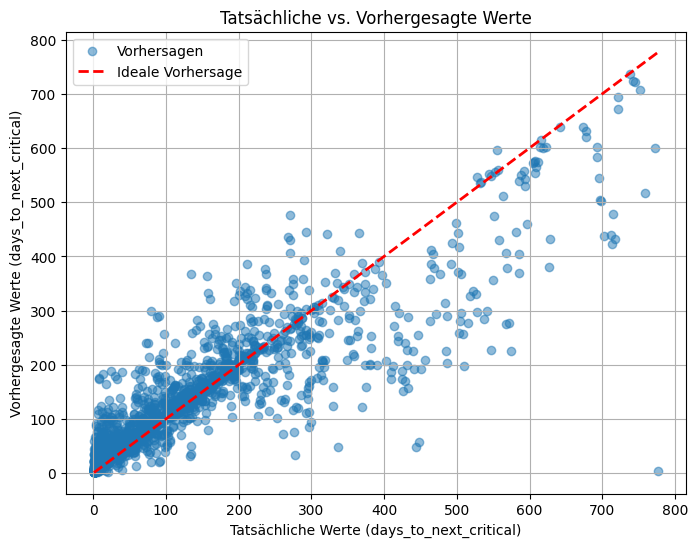

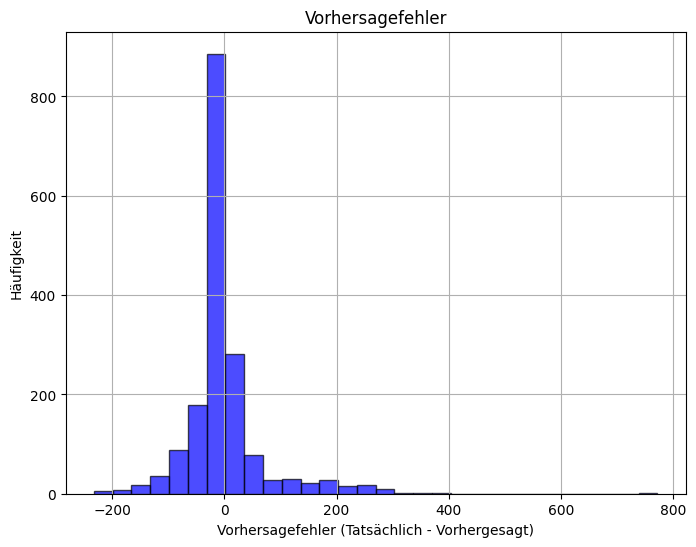

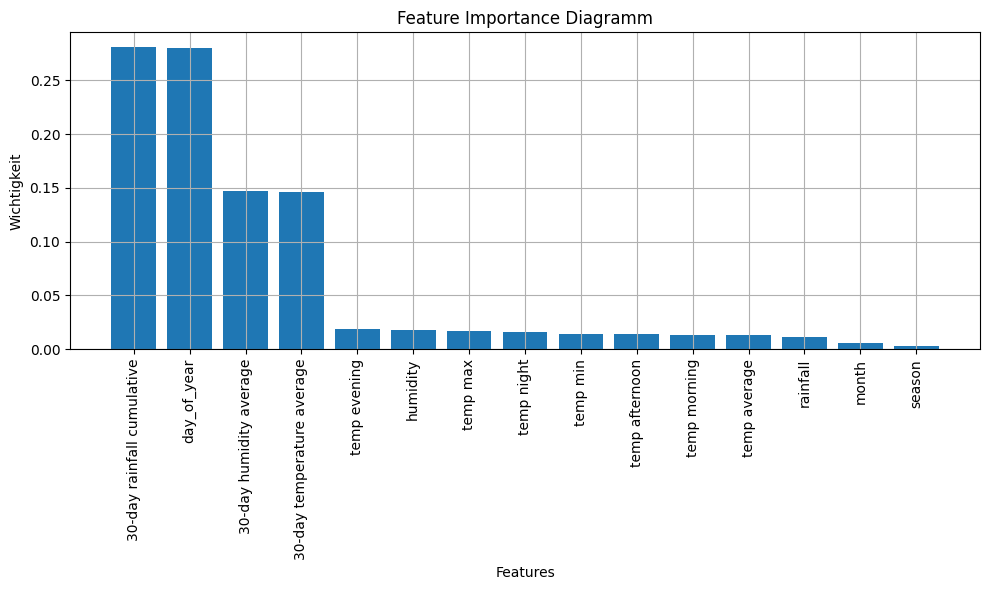

In [ ]:
# Diagramme für die Evaluation des Modells
import matplotlib.pyplot as plt
import numpy as np

model_path = 'critical_growth_model.pkl'
model = joblib.load(model_path)

# Scatterplot: Tatsächliche vs. Vorhergesagte Werte
def plot_scatter_actual_vs_predicted(y_test, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, label="Vorhersagen")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideale Vorhersage")
    plt.xlabel("Tatsächliche Werte (days_to_next_critical)")
    plt.ylabel("Vorhergesagte Werte (days_to_next_critical)")
    plt.title("Tatsächliche vs. Vorhergesagte Werte")
    plt.legend()
    plt.grid(True)
    plt.show()

# Histogramm der Vorhersagefehler
def plot_prediction_errors(y_test, y_pred):
    errors = y_test - y_pred
    plt.figure(figsize=(8, 6))
    plt.hist(errors, bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.xlabel("Vorhersagefehler (Tatsächlich - Vorhergesagt)")
    plt.ylabel("Häufigkeit")
    plt.title("Vorhersagefehler")
    plt.grid(True)
    plt.show()

# Feature Importance Plot
def plot_feature_importance(model, feature_names):
    importance = model.feature_importances_
    indices = np.argsort(importance)[::-1]  # Sortierung nach Wichtigkeit
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(importance)), importance[indices], align="center")
    plt.xticks(range(len(importance)), [feature_names[i] for i in indices], rotation=90)
    plt.xlabel("Features")
    plt.ylabel("Wichtigkeit")
    plt.title("Feature Importance Diagramm")
    plt.tight_layout()
    plt.grid(True)
    plt.show()

# Aufrufen der Diagramme
plot_scatter_actual_vs_predicted(y_test, y_pred)
plot_prediction_errors(y_test, y_pred)
plot_feature_importance(model, features.columns)
